In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from PIL import Image

In [2]:
url = "https://gbfs.mex.lyftbikes.com/gbfs/en/station_information.json"

In [3]:
response = requests.get(url)

KeyboardInterrupt: 

In [6]:
stations = pd.DataFrame.from_dict(response.json()['data']['stations'])
stations.set_index("station_id",inplace=True)
stations.shape

(670, 11)

In [7]:
stations.head()

,external_id,name,short_name,lat,lon,rental_methods,capacity,electric_bike_surcharge_waiver,is_charging,eightd_has_key_dispenser,has_kiosk
station_id,,,,,,,,,,,
5,3ea89109-d2f3-46eb-9c41-c43742050340,CE-407 Prolongación Xochicalco-General Emilia...,407,19.367266,-99.158656,"[CREDITCARD, KEY]",19,False,False,False,True
6,ba78b703-4e5a-44bd-ab2c-1eedc71e11c3,CE-428 Prolongación Uxmal-Av. Popocatépetl (E...,428,19.363404,-99.160395,"[CREDITCARD, KEY]",27,False,False,False,True
7,6563d263-2342-46e3-8983-461e68d2d615,CE-427 Avenida México-Coyoacán-Av. Popocatépet...,427,19.364906,-99.162987,"[CREDITCARD, KEY]",19,False,False,False,True
8,ec55e597-c8fc-4e86-bcfe-b0e81a494790,CE-443 Bruno Traven-Golondrinas,443,19.359583,-99.162085,"[CREDITCARD, KEY]",31,False,False,False,True
9,a98c7fac-12ce-4895-923b-6b39f04721ca,CE-423 Moras-José María Rico (Eje 8),423,19.367816,-99.175269,"[CREDITCARD, KEY]",23,False,False,False,True


In [8]:
stations.tail()

,external_id,name,short_name,lat,lon,rental_methods,capacity,electric_bike_surcharge_waiver,is_charging,eightd_has_key_dispenser,has_kiosk
station_id,,,,,,,,,,,
684,3e0dcf75-022c-4207-9ce1-049cd38b7df6,CE-676 Ricardo Palmerín - Abundio Martínez,676,19.358236,-99.188106,"[CREDITCARD, KEY]",19,False,False,False,True
685,afb2c18b-b010-40de-ba07-0fa6288dc5e4,CE-680 Diego Becerra - Av. Revolución,680,19.366718,-99.188324,"[CREDITCARD, KEY]",27,False,False,False,True
695,b2e4a2d4-5cda-4099-b0a6-8db3bae27c8a,CE-677 Juan Pablo II - Av. de los Insurgentes...,677,19.359040,-99.184498,"[CREDITCARD, KEY]",35,False,False,False,True
698,1f652ea2-4be5-4d30-b73c-2cb7d1266a70,CE 682- Manuel M. Ponce - Fernando M. Villalpando,682,19.353534,-99.189548,"[CREDITCARD, KEY]",23,False,False,False,True
699,a1e9daf9-b993-4abb-8e39-66515ffcfa56,CE- 681 Guty Cárdenas - Ricardo Castro,681,19.355844,-99.189141,"[CREDITCARD, KEY]",19,False,False,False,True


In [9]:
stations[['lon','lat']].describe()

,lon,lat
count,670.000000,670.000000
mean,-99.167436,19.408047
std,0.016507,0.030936
min,-99.212845,19.344107
25%,-99.178233,19.383188
50%,-99.167215,19.412086
75%,-99.156137,19.432263
max,-99.130918,19.471112


In [10]:
x_dim, y_dim = [-99.2150,-99.13],[19.358,19.4500]

In [11]:
status_url = "https://gbfs.mex.lyftbikes.com/gbfs/en/station_status.json"
status_response = requests.get(status_url)

status = pd.DataFrame.from_dict(status_response.json()['data']['stations'])
status.set_index("station_id",inplace=True)
status.shape

(670, 10)

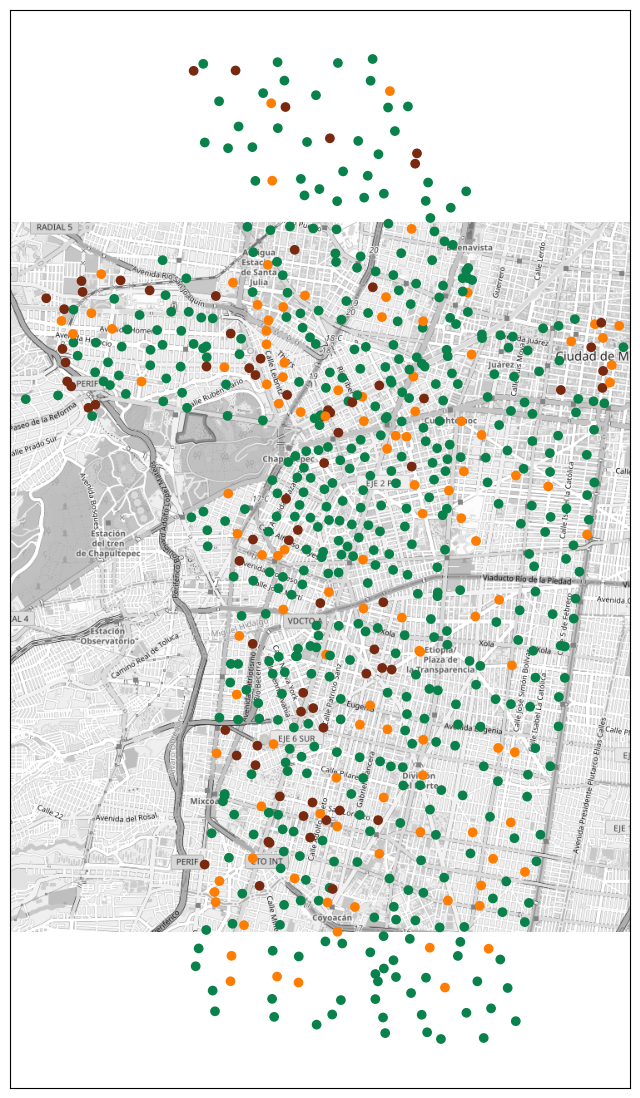

In [12]:
fig, ax = plt.subplots(figsize=(14, 14))
image = Image.open('cdmx_map.png').convert("L")
ax.imshow(image,cmap='gray', vmin=0, vmax=255)
ax.set_xticks([]);
ax.set_yticks([]);

d = stations.loc[lambda x : x.capacity>0]\
.assign(lon=lambda x: 
x.lon.apply(lambda xx: ax.get_xlim()[0]+(((xx-x_dim[0])/(x_dim[1]-x_dim[0]))*(ax.get_xlim()[1]-ax.get_xlim()[0]))))\
.assign(lat = lambda x:
x.lat.apply(lambda xx: ax.get_ylim()[0]+(((xx-y_dim[0])/(y_dim[1]-y_dim[0]))*(ax.get_ylim()[1]-ax.get_ylim()[0]))))\
[['lon','lat']].copy()

c = stations.assign(a=lambda x: x.index.map(status.num_bikes_available))['a'].mask(lambda x: x>=3,"#09814A")\
    .mask(lambda x: x.isin([1,2]),"#FF7D00").mask(lambda x: x==0,"#78290F")

ax.scatter(d.lon,d.lat,color=c.loc[d.index]);

In [14]:
status.is_installed.value_counts()

is_installed
1    670
Name: count, dtype: int64

In [15]:
status.tail()

,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,is_installed,is_renting,is_returning,last_reported,eightd_has_available_keys,is_charging
station_id,,,,,,,,,,
684,13,1,5,0,1,1,1,1719358169,False,False
685,0,2,25,0,1,1,1,1719358202,False,False
695,14,1,20,0,1,1,1,1719357369,False,False
698,10,0,13,0,1,1,1,1719358275,False,False
699,14,1,4,0,1,1,1,1719354860,False,False


In [16]:
stations[stations.station_id=='322']

AttributeError: 'DataFrame' object has no attribute 'station_id'

In [17]:
status.num_bikes_available.divide(stations.capacity).describe()

count    670.000000
mean       0.292484
std        0.242608
min        0.000000
25%        0.086957
50%        0.256231
75%        0.444444
max        1.000000
dtype: float64

In [18]:
stations[stations.name.str.lower().str.contains("ginebra")]

,external_id,name,short_name,lat,lon,rental_methods,capacity,electric_bike_surcharge_waiver,is_charging,eightd_has_key_dispenser,has_kiosk
station_id,,,,,,,,,,,
309,d40abda3-8a2b-43bf-950c-e1ad45085050,CE-465 Lago Ginebra-Lago Wetter,465,19.445039,-99.194078,"[CREDITCARD, KEY]",27,False,False,False,True
